## Assignment 3

### Ensemble Models

- Ana Araujo, 59457
- Pedro Almeida, 58844

**Exercise:**
Implement a Weighted Average Ensemble System in Python.
This ensemble system combines the output of several experts with a linear combination, whose weights are the accuracy scores of the experts on the dataset. This output should be rounded to the nearest integer.
Given a set of experts {f1, f2, . . . , fn}, with accuracy scores {a1, a2, . . . , an}, and input X, the output of the system becomes:

round(softmax([a1, a2, . . . , an]) · [f1(X), f2(X), . . . , fn(X)]) (1)

Use different types of classifiers as experts, with different hyperparameters, e.g. two Decision Trees with gini and entropy as criterion, two SVM’s with polynomial and RBF kernel, and other
classifiers you have previously learned.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from scipy.special import softmax

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

## Workflow

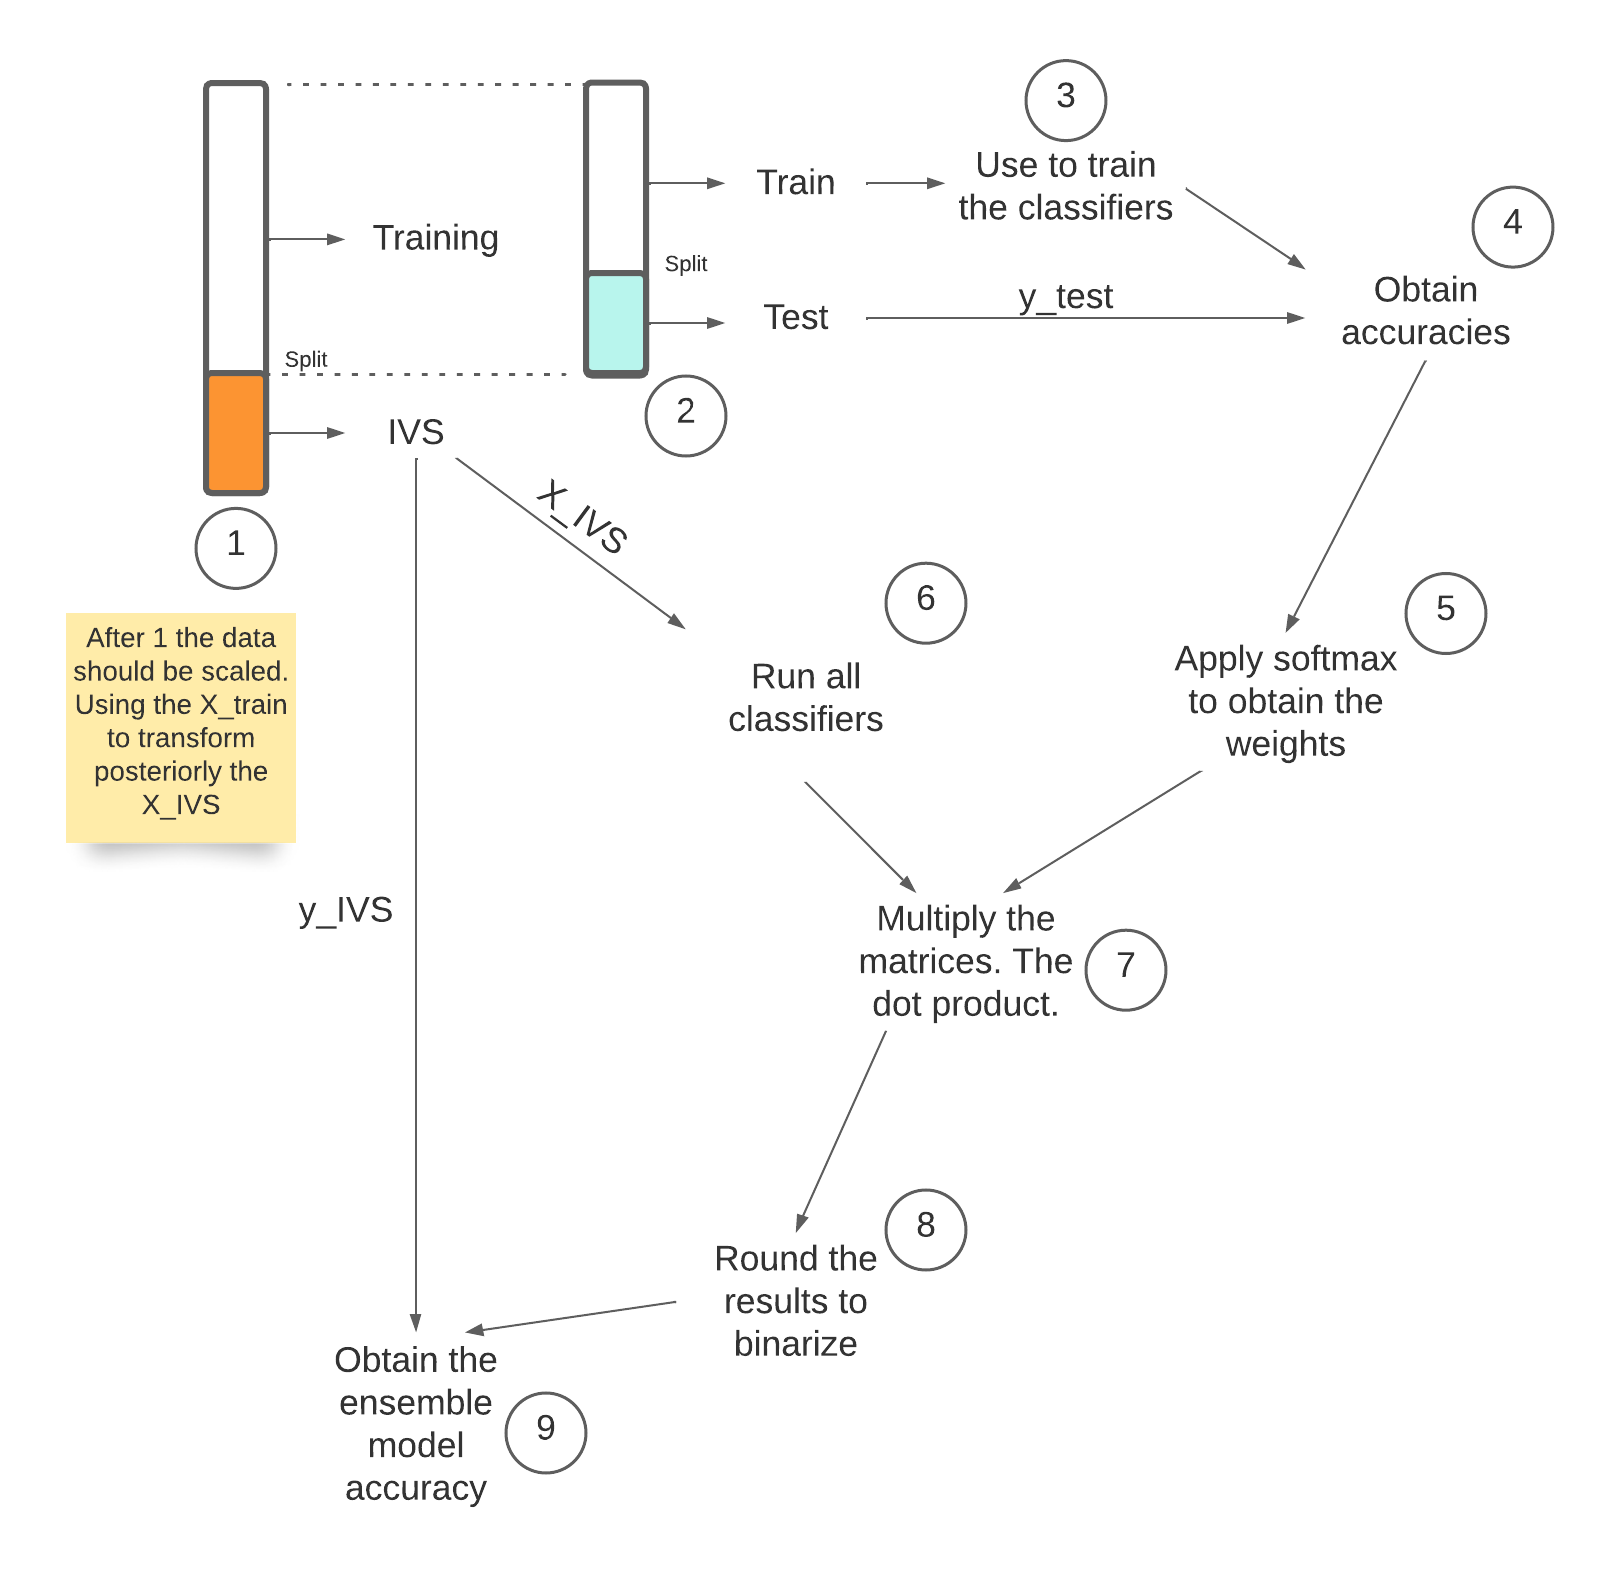

### 1st step: split the data between training and IVS.

In [3]:
X_train,X_IVS,y_train,y_IVS = train_test_split(X, y, test_size=0.20, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_IVS = scaler.transform(X_IVS)

### 2nd step: split the data again between training and testing.

In [4]:
X_train_2, X_test, y_train_2, y_test = train_test_split(X_train_scaled, y_train, test_size=0.20, random_state=123)

### 3rd step: use X_train and y_train to train the desired classifiers

In [5]:
classifiers = [LogisticRegression(random_state=0).fit(X_train_2, y_train_2),
               svm.SVC(kernel='rbf', degree=1, C=20, gamma = 'auto').fit(X_train_2, y_train_2),
               DecisionTreeClassifier().fit(X_train_2, y_train_2),GaussianNB().fit(X_train_2, y_train_2),
               KNeighborsClassifier(n_neighbors=3).fit(X_train_2, y_train_2)]

### 4th step: use y_test to obtain the accuracies for each classifier.

In [6]:
predicts = [cls.predict(X_test) for cls in classifiers]
accuracies = [accuracy_score(y_test, pred) for pred in predicts]

### 5th step: apply softmax to obtain the weight vector.

In [7]:
weights = softmax(accuracies)

### 6th step: to make predictions start by running X_IVS in each classifier.

In [8]:
predicts_2 = [cls.predict(X_IVS) for cls in classifiers]

### 7th step: do the dot product between the matrices obtained in the 5th and 6th steps

In [9]:
relative_predictions = np.dot(weights,predicts_2)

### 8th step: since the result is not binary we need to round.

In [10]:
bin_preds = [round(pred) for pred in relative_predictions]

### 9th step: Use the IVS to see the final accuracy

In [11]:
acc = accuracy_score(y_IVS, bin_preds)
acc

0.9824561403508771